## DOS for different lengths and bin sizes

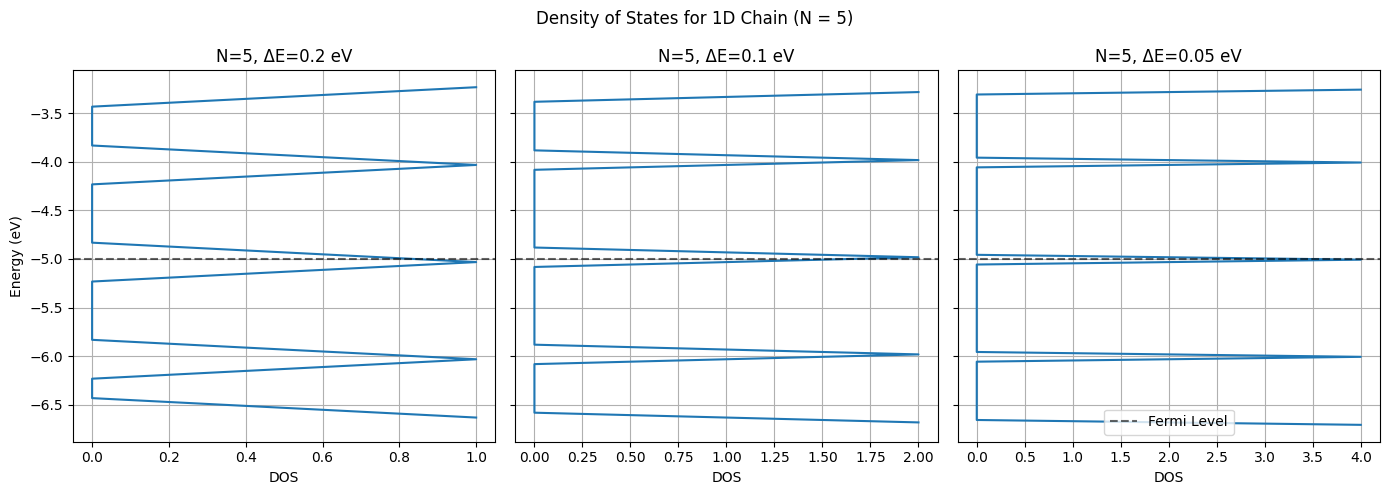

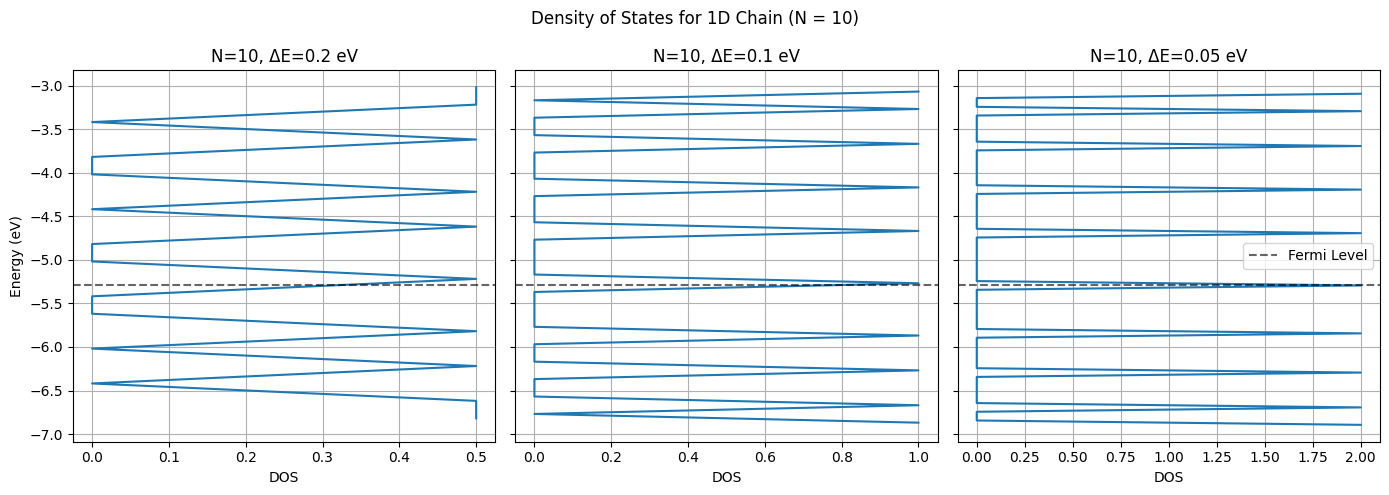

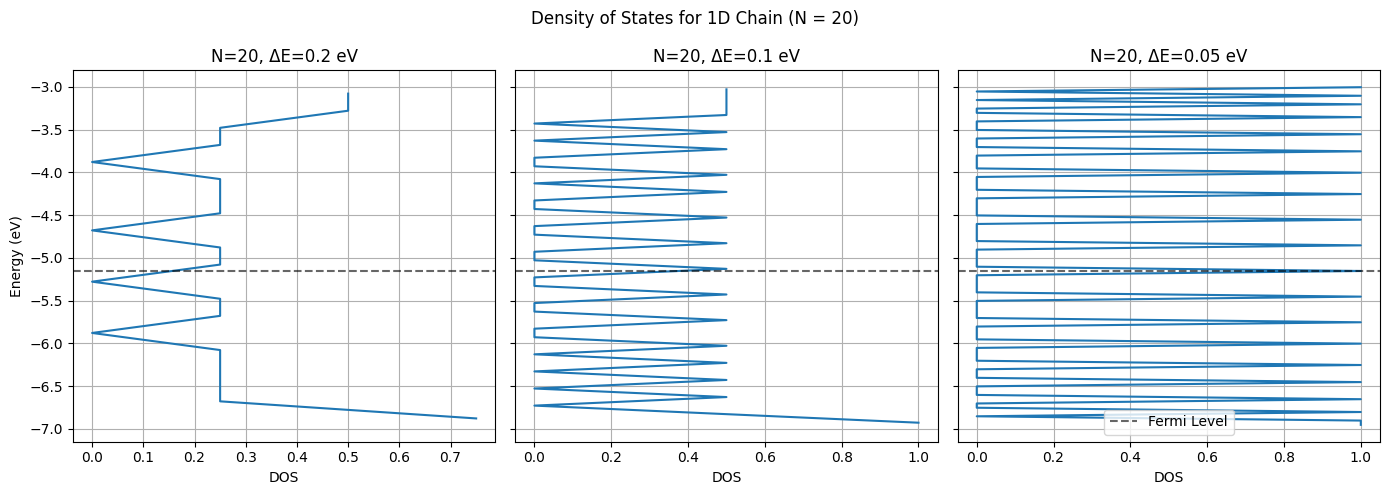

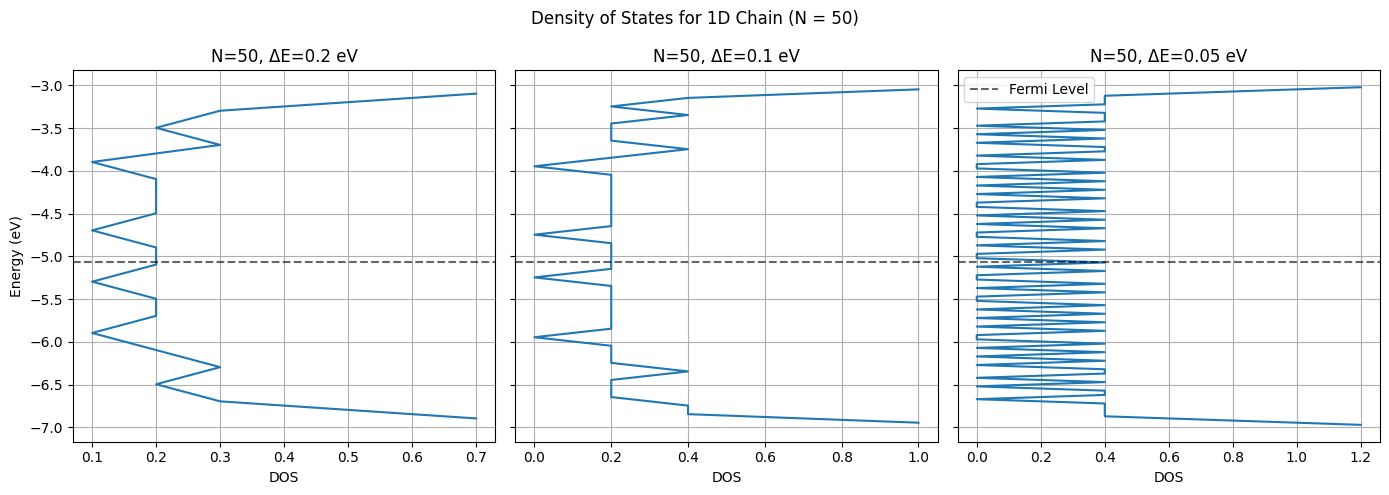

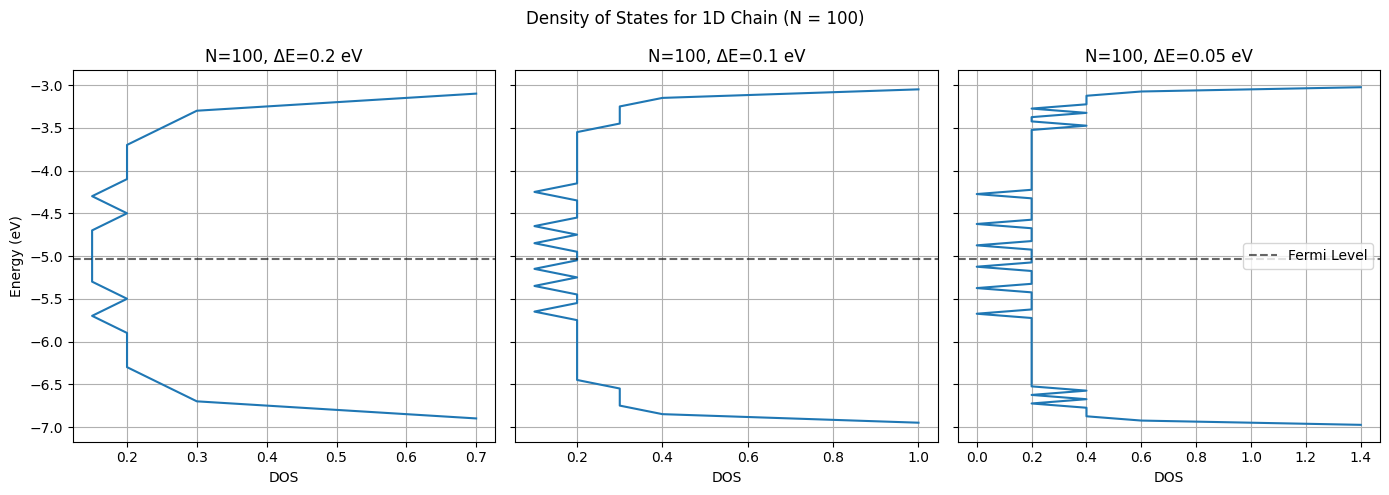

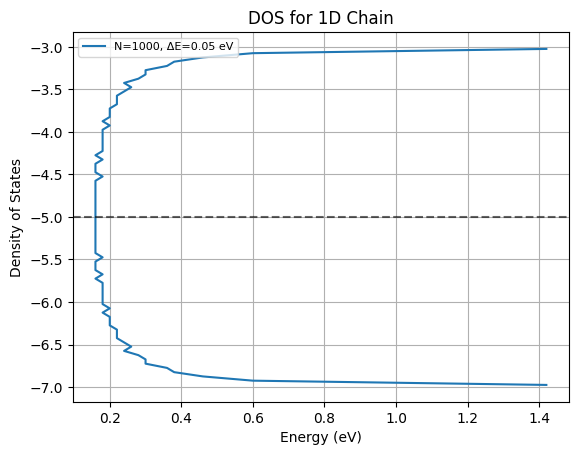

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

E0 = -5.0     # eV
beta = -1.0  # eV

def create_superdiagonal_matrix(n, diag_value, off_diag_value):
    M = np.diag([off_diag_value] * (n - 1), k=-1)
    M += np.diag([off_diag_value] * (n - 1), k=1)
    M += np.diag([diag_value] * n)
    return M

def find_density_of_states(eigenvalues, bin_width):
    Emin, Emax = eigenvalues.min(), eigenvalues.max()
    bins = np.arange(Emin, Emax + bin_width, bin_width)
    density, bin_edges = np.histogram(eigenvalues, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return bin_centers, density

Ns = [5, 10, 20, 50, 100]
bin_widths = [0.2, 0.1, 0.05]

for N in Ns:
    fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

    H = create_superdiagonal_matrix(N, E0, beta)
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Fermi level
    Ef = eigenvalues[N//2 - 1] if N % 2 == 0 else eigenvalues[N//2]

    for ax, bw in zip(axes, bin_widths):
        bin_centers, density = find_density_of_states(eigenvalues, bw)

        ax.plot(density, bin_centers)
        ax.axhline(Ef, color='k', linestyle='--', alpha=0.6, label='Fermi Level')

        ax.set_title(f'N={N}, ΔE={bw} eV')
        ax.set_xlabel("DOS")
        ax.grid()

    axes[0].set_ylabel("Energy (eV)")
    fig.suptitle(f"Density of States for 1D Chain (N = {N})")
    plt.tight_layout()
    plt.legend()
    plt.show()


H2 = create_superdiagonal_matrix(1000, E0, beta)
eigenvalues, eigenvectors = np.linalg.eigh(H2)

# Fermi level
Ef = eigenvalues[1000//2 - 1] if 1000 % 2 == 0 else eigenvalues[1000//2]
bin_centers, density = find_density_of_states(eigenvalues, 0.05)
plt.plot(density, bin_centers, label=f'N={1000}, ΔE={0.05} eV')
plt.title('Density of States for 1D Chain')
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States")
plt.title("DOS for 1D Chain")
plt.legend(fontsize=8)
plt.axhline(Ef, color='k', linestyle='--', alpha=0.6, label='Fermi Level'  ) #fermi level line
plt.grid()
plt.show()

## Plotting eigenstates

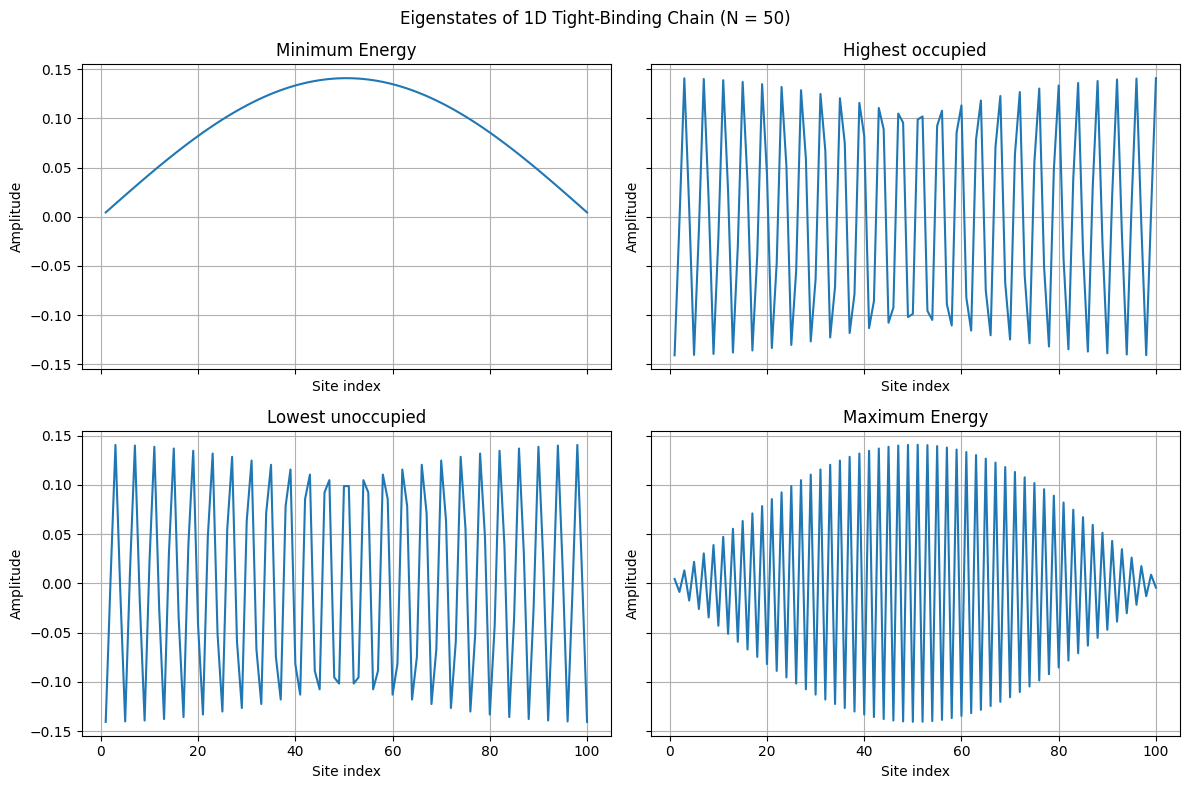

In [ ]:
N = 1000
H = create_superdiagonal_matrix(N, E0, beta)
eigenvalues, eigenvectors = np.linalg.eigh(H)

idx_min = 0
idx_max = -1
idx_ho = N//2 - 1
idx_lu = N//2

states = [idx_min, idx_ho, idx_lu, idx_max]
labels = ["Minimum Energy", "Highest occupied", "Lowest unoccupied", "Maximum Energy"]

sites = np.arange(1, N+1)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

for ax, idx, label in zip(axes.flat, states, labels):
    ax.plot(sites, eigenvectors[:, idx])
    ax.set_title(label)
    ax.set_xlabel("Site index")
    ax.set_ylabel("Amplitude")
    ax.grid()

plt.suptitle("Eigenstates of 1D Tight-Binding Chain (N = 100)")
plt.tight_layout()
plt.show()
